# Historic Keywords Car Doctor

## 1. Data processing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("D:/ALEXANDER/Desktop/CAR DOCTOR/historic_keywords_may_2024.csv")
df.head()

,Estado de la palabra clave,Palabra clave,Tipo de concordancia,Campaña,Grupo de anuncios,Estado,Motivos del estado,Impr.,Clics,CTR esperado,CTR,Tasa de conv.,Valor de conv.,Valor conv./coste,Conversiones,Código de moneda,CPC medio,Coste/conv.
0,Habilitado,mecanico a domicilio cerca de mi,Concordancia amplia,BUSQUEDA AGO-SEP 2022,Grupo de anuncios 1,No apto,campaña en pausa,0.0,0,--,--,"0,00%","0,00","0,00","0,00",MXN,0,"0,00"
1,Habilitado,reparación de coches,Concordancia amplia,BUSQUEDA AGO-SEP 2022,Grupo de anuncios 1,No apto,campaña en pausa,0.0,0,--,--,"0,00%","0,00","0,00","0,00",MXN,0,"0,00"
2,Habilitado,mecanico auto a domicilio,Concordancia amplia,BUSQUEDA AGO-SEP 2022,Grupo de anuncios 1,No apto,campaña en pausa,0.0,0,--,--,"0,00%","0,00","0,00","0,00",MXN,0,"0,00"
3,Habilitado,afinacion,Concordancia amplia,BUSQUEDA AGO-SEP 2022,Grupo de anuncios 1,No apto,campaña en pausa,74.0,7,--,"9,46%","14,29%","1,00","0,01","1,00",MXN,"10,75","75,28"
4,Habilitado,mecanico automotriz a domicilio,Concordancia amplia,BUSQUEDA AGO-SEP 2022,Grupo de anuncios 1,No apto,campaña en pausa,0.0,0,--,--,"0,00%","0,00","0,00","0,00",MXN,0,"0,00"


In [4]:
df2 = df[["Palabra clave", "Impr.", "Clics", "Conversiones"]]
df2.head()

,Palabra clave,Impr.,Clics,Conversiones
0,mecanico a domicilio cerca de mi,0.0,0,"0,00"
1,reparación de coches,0.0,0,"0,00"
2,mecanico auto a domicilio,0.0,0,"0,00"
3,afinacion,74.0,7,"1,00"
4,mecanico automotriz a domicilio,0.0,0,"0,00"


In [5]:
def convert_to_float(value):
    if isinstance(value, str):
        return float(value.replace(',','.'))
    else: 
        return float(value)

In [6]:
dfnum = df2[["Impr.", "Clics", "Conversiones"]].applymap(convert_to_float)
dfnum.head()

,Impr.,Clics,Conversiones
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,74.0,7.0,1.0
4,0.0,0.0,0.0


In [7]:
df_keywords = df2["Palabra clave"]
df_keywords.head()

0    mecanico a domicilio cerca de mi
1                reparación de coches
2           mecanico auto a domicilio
3                           afinacion
4     mecanico automotriz a domicilio
Name: Palabra clave, dtype: object

In [8]:
df2 = pd.concat([df_keywords,dfnum], axis = 1)

In [8]:
df2.head()

,Palabra clave,Impr.,Clics,Conversiones
0,mecanico a domicilio cerca de mi,0.0,0.0,0.0
1,reparación de coches,0.0,0.0,0.0
2,mecanico auto a domicilio,0.0,0.0,0.0
3,afinacion,74.0,7.0,1.0
4,mecanico automotriz a domicilio,0.0,0.0,0.0


In [9]:
df2 = df2.sort_values(by = "Conversiones", ascending=False)
df2.head()

,Palabra clave,Impr.,Clics,Conversiones
479,mecanico a domicilio,1.121,204.0,73.84
476,servicio automotriz,2.150,207.0,60.50
406,mecanico a domicilio,1.194,186.0,59.00
323,taller automotriz,1.274,124.0,41.00
417,taller mecanico,1.716,177.0,39.00


In [10]:
df_final = df2.groupby("Palabra clave")[["Impr.", "Clics", "Conversiones"]].sum().reset_index()

In [11]:
df_final = df_final.sort_values(by = "Conversiones", ascending = False)

In [12]:
df_final.head()

,Palabra clave,Impr.,Clics,Conversiones
97,servicio automotriz,6394.198,1272.0,308.67
43,mecanico a domicilio,3291.315,899.0,264.26
124,taller automotriz,5942.068,1079.0,198.84
167,taller mecanico,6578.140,1007.0,167.50
55,mecanico cerca de mi,4390.000,672.0,124.66


## 2. Import to CSV

In [79]:
df_final.to_csv("Resultado Palabras Clave Historico Mayo 2024.csv")

## 3. Data Visualization

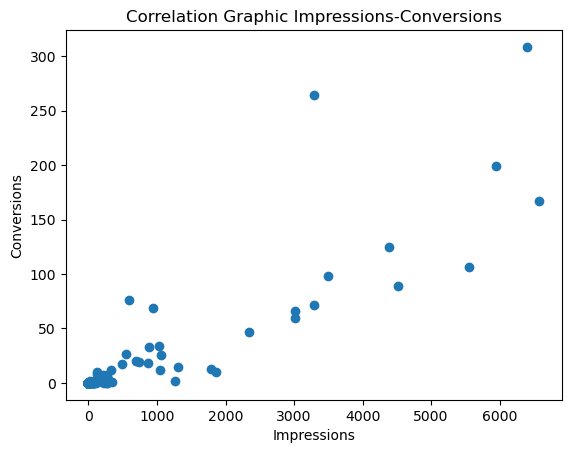

In [26]:
k = df_final["Palabra clave"]
x = df_final["Impr."]
y = df_final["Conversiones"]
z = df_final["Clics"]
plt.scatter(x,y)
plt.title("Correlation Graphic Impressions-Conversions")
plt.xlabel("Impressions")
plt.ylabel("Conversions")
plt.show()

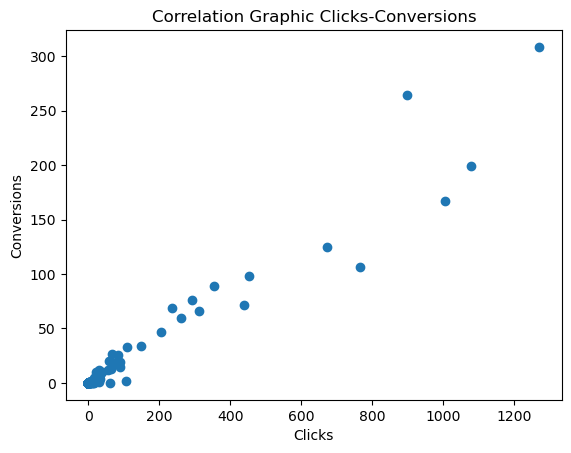

In [27]:
plt.scatter(z,y)
plt.title("Correlation Graphic Clicks-Conversions")
plt.xlabel("Clicks")
plt.ylabel("Conversions")
plt.show()

In [15]:
corr = df_final.corr()

C:\Users\52332\AppData\Local\Temp\ipykernel_12900\1675215204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


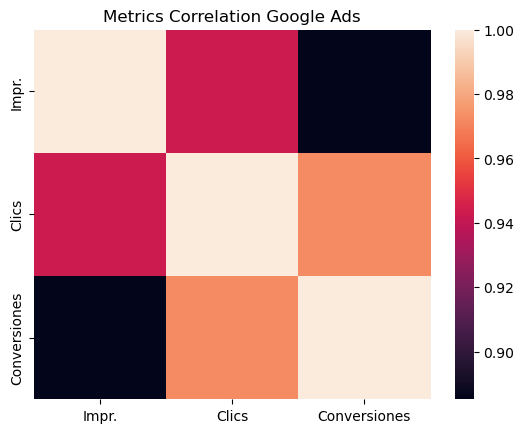

In [25]:
plt.title("Metrics Correlation Google Ads")
sns.heatmap(corr)
plt.show()

In [17]:
corr

,Impr.,Clics,Conversiones
Impr.,1.000000,0.942669,0.885192
Clics,0.942669,1.000000,0.972395
Conversiones,0.885192,0.972395,1.000000
